In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def knn_predict(X_train, y_train, X_test, k=3):
    predictions = []
    for x in X_test:
        # Вычисляем расстояния до всех точек в тренировочном наборе
        distances = [euclidean_distance(x, x_train) for x_train in X_train]
        # Получаем индексы k ближайших соседей
        k_indices = np.argsort(distances)[:k]
        # Получаем значения целевой переменной для k ближайших соседей
        k_nearest_labels = [y_train[i] for i in k_indices]
        # Возвращаем среднее значение целевой переменной для k ближайших соседей
        predictions.append(np.mean(k_nearest_labels))
    return np.array(predictions)



[ 7. 11.]


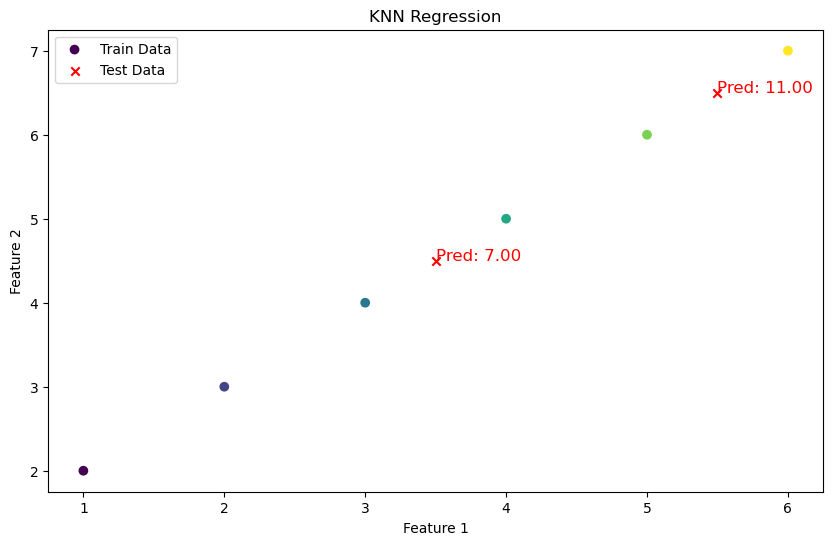

In [3]:
# Пример данных
X_train = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7]])
y_train = np.array([3, 5, 7, 9, 11, 13])

X_test = np.array([[3.5, 4.5], [5.5, 6.5]])

# Делаем предсказания
predictions = knn_predict(X_train, y_train, X_test, k=3)
print(predictions)

# Построение графиков
plt.figure(figsize=(10, 6))

# График тренировочных данных
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', label='Train Data')

# График тестовых данных
plt.scatter(X_test[:, 0], X_test[:, 1], c='red', marker='x', label='Test Data')

# График предсказаний
for i, pred in enumerate(predictions):
    plt.text(X_test[i, 0], X_test[i, 1], f'Pred: {pred:.2f}', color='red', fontsize=12)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KNN Regression')
plt.legend()
plt.show()